In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('Crime_Data_from_2010_to_Present.csv', parse_dates=[ 'Date Occurred', 'Time Occurred'])

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [5]:
df.columns = [col.strip() for col in df.columns]


In [10]:
df1 = df[['Victim Age', 'Victim Sex', 'Victim Descent', 'Area Name', 'Crime Code Description', 'Time Occurred']]

In [13]:
df1 = df1.dropna()

In [16]:
df1.head()

,Victim Age,Victim Sex,Victim Descent,Area Name,Crime Code Description,Time Occurred
0,30.0,F,W,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,1800
4,84.0,M,W,Topanga,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2300
5,49.0,F,W,Central,CRIMINAL HOMICIDE,1400
9,27.0,F,O,Van Nuys,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0800
12,42.0,M,H,77th Street,THEFT PLAIN - PETTY ($950 & UNDER),1200


In [18]:
df['Victim Sex'].value_counts()

M    816373
F    745030
X     31938
H        60
-         1
Name: Victim Sex, dtype: int64

In [33]:
df2.columns = ['Count']

In [42]:
df2.describe()

,Count
count,404.000000
mean,3645.247525
std,11936.443080
min,1.000000
25%,8.000000
50%,81.500000
75%,839.000000
max,83598.000000


In [49]:
dftemp = df1.groupby('Crime Code Description').agg({'Time Occurred':'count'})
df3 = dftemp[dftemp['Time Occurred'] >= 2000]

In [51]:
df3.head()

,Time Occurred
Crime Code Description,
ARSON,2139
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",73278
ATTEMPTED ROBBERY,9361
BATTERY - SIMPLE ASSAULT,157703
BATTERY WITH SEXUAL CONTACT,8802


In [52]:
df4 = df1.groupby(['Crime Code Description','Victim Sex']).agg({'Time Occurred': "count"})

In [58]:
df3.index

Index(['ARSON', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'ATTEMPTED ROBBERY', 'BATTERY - SIMPLE ASSAULT',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN', 'BRANDISH WEAPON',
       'BUNCO, GRAND THEFT', 'BUNCO, PETTY THEFT', 'BURGLARY',
       'BURGLARY FROM VEHICLE', 'BURGLARY FROM VEHICLE, ATTEMPTED',
       'BURGLARY, ATTEMPTED', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'CHILD ANNOYING (17YRS & UNDER)', 'CONTEMPT OF COURT',
       'CRIMINAL HOMICIDE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060',
       'DISTURBING THE PEACE', 'DOCUMENT FORGERY / STOLEN FELONY',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 'INDECENT EXPOSURE',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LETTERS, LEWD', 'OTHER ASSAULT',
       'OTHER MISCELLANEOUS CRIME', 'RAPE, FORCIBLE', 'ROBBERY',
       'SEX, UNLAWFUL', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)

In [72]:
df4.reset_index()
df4.head()
# df4['Crime Code Description'] == 'ARSON'

Time Occurred
Crime Code Description Victim Sex               
ABORTION/ILLEGAL       F                       2
                       M                       3
ARSON                  F                     804
                       M                    1293
                       X                      42

In [ ]:
#df1.groupby('Crime Code Description').agg({'Time Occurred':'count'}).filter


In [110]:
df4 = df4[df4['Crime Code Description'].apply(lambda x: x in df3.index)]

In [115]:
df4.shape

(159, 4)

In [121]:
df4.set_index(['Crime Code Description'],inplace = True)

KeyError: 'Crime Code Description'

In [126]:
df4.drop(['index1'],1,inplace = True)

In [133]:
df4.reset_index(inplace = True)

In [135]:
df4.set_index(['Crime Code Description', 'Victim Sex'], inplace = True)

In [136]:
df4.head()

Time Occurred
Crime Code Description                         Victim Sex               
ARSON                                          F                     804
                                               M                    1293
                                               X                      42
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT F                   20090
                                               H                       5

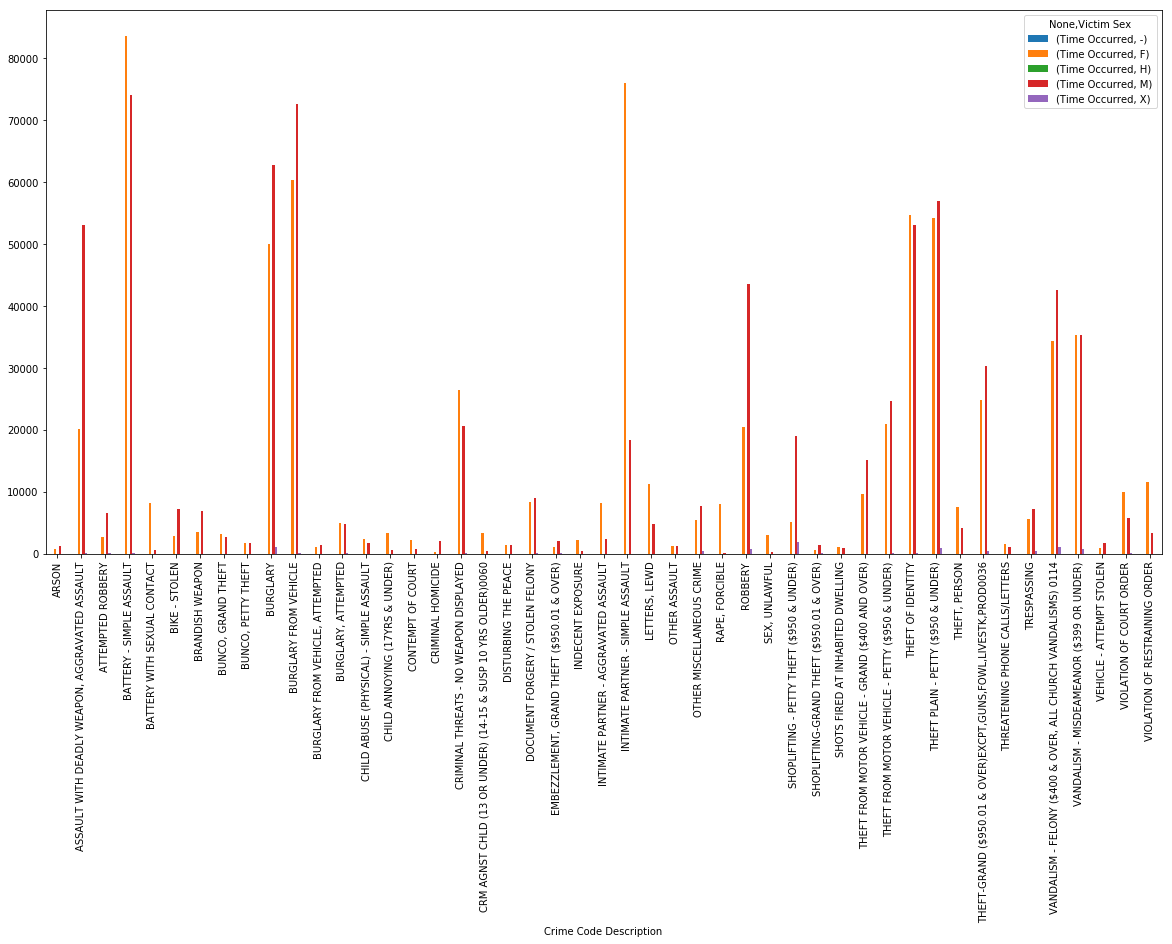

In [141]:
# f,a = plt.subplots(10,10)
# for i in range(len(a)):
#     df4.xs('Crime Code Description').plot(kind='bar',ax=a[i])
figure = figsize(20,10)
df4.unstack().plot(kind='bar')


In [151]:
df5 = df4.reset_index()

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

RuntimeError: matplotlib does not support generators as input

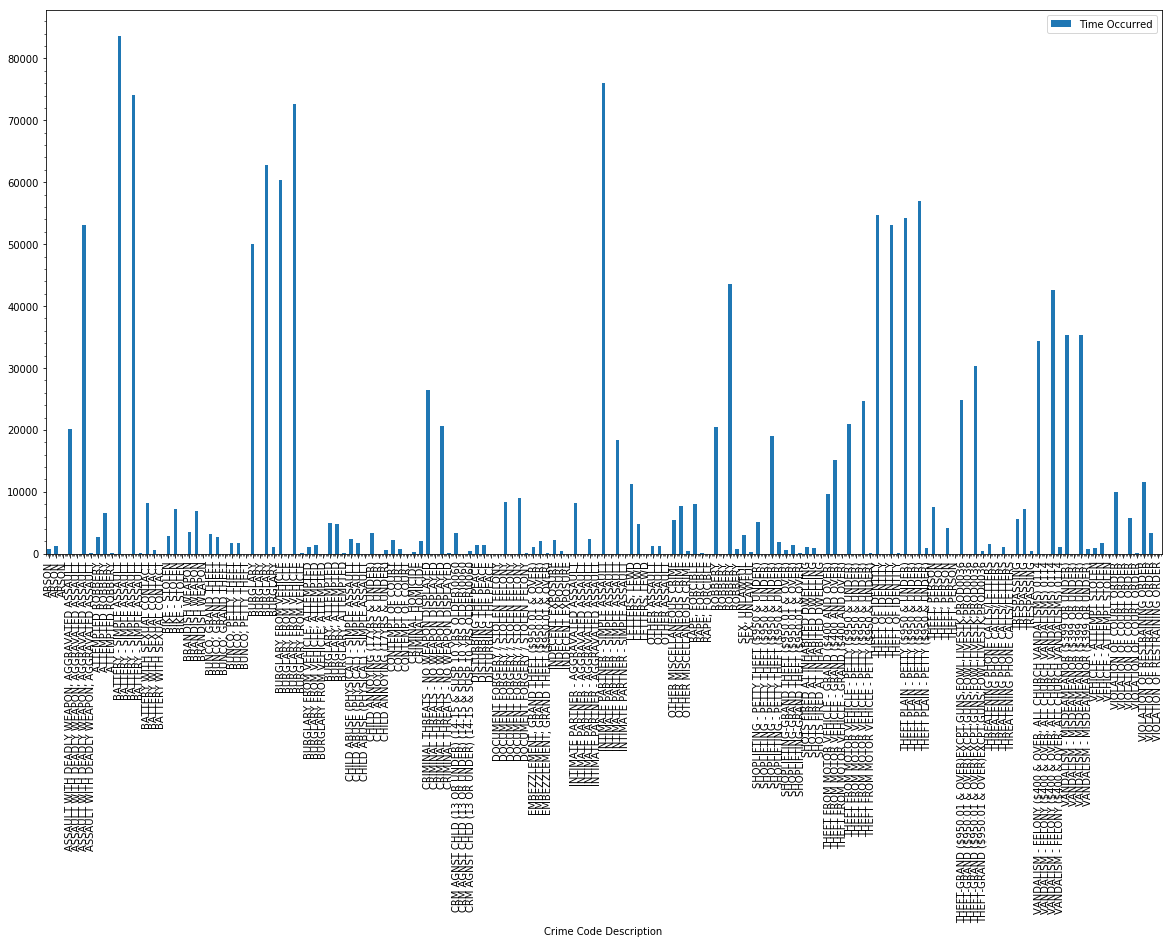

In [129]:
# ax = df.plot(kind='bar',figsize=(10,4), rot = 0)
ax = df4.plot(kind='bar', figsize=(20, 10))

# # "Activate" minor ticks
ax.minorticks_on()

# # Get location of the center of each rectangle
rects_locs = map(lambda x: x.get_x() +x.get_width()/2., ax.patches)
# # Set minor ticks there
ax.set_xticks(rects_locs, minor = True)


# # Labels for the rectangles
new_ticks = reduce(lambda x, y: x + y, map(lambda x: [x] * df.shape[0], df.columns.tolist()))
# # Set the labels
from matplotlib import ticker
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(new_ticks))  #add the custom ticks

# # Move the category label further from x-axis
ax.tick_params(axis='x', which='major', pad=15)

# # Remove minor ticks where not necessary
ax.tick_params(axis='x',which='both', top='off')
ax.tick_params(axis='y',which='both', left='off', right = 'off')



RuntimeError: matplotlib does not support generators as input

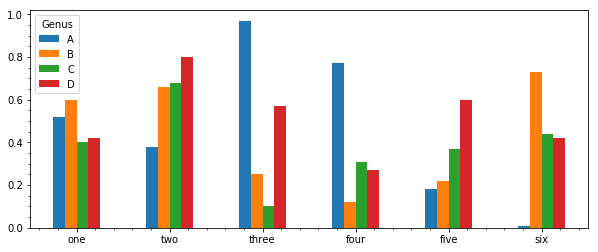

In [114]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'],
                 name='Genus')).round(2)

ax = df.plot(kind='bar',figsize=(10,4), rot = 0)

# "Activate" minor ticks
ax.minorticks_on()

# Get location of the center of each rectangle
rects_locs = map(lambda x: x.get_x() +x.get_width()/2., ax.patches)
# Set minor ticks there
ax.set_xticks(rects_locs, minor = True)


# Labels for the rectangles
new_ticks = reduce(lambda x, y: x + y, map(lambda x: [x] * df.shape[0], df.columns.tolist()))
# Set the labels
from matplotlib import ticker
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(new_ticks))  #add the custom ticks

# Move the category label further from x-axis
ax.tick_params(axis='x', which='major', pad=15)

# Remove minor ticks where not necessary
ax.tick_params(axis='x',which='both', top='off')
ax.tick_params(axis='y',which='both', left='off', right = 'off')

In [155]:
df5 = df5[df5['Victim Sex'] != 'X']

In [157]:
df5 = df5[df5['Victim Sex'] != 'H']

In [168]:
df5.head()

,Crime Code Description,Victim Sex,Time Occurred
0,ARSON,F,804
1,ARSON,M,1293
3,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,20090
5,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",M,53076
7,ATTEMPTED ROBBERY,F,2733


In [173]:
df5.set_index(['Crime Code Description','Victim Sex'], inplace = True)

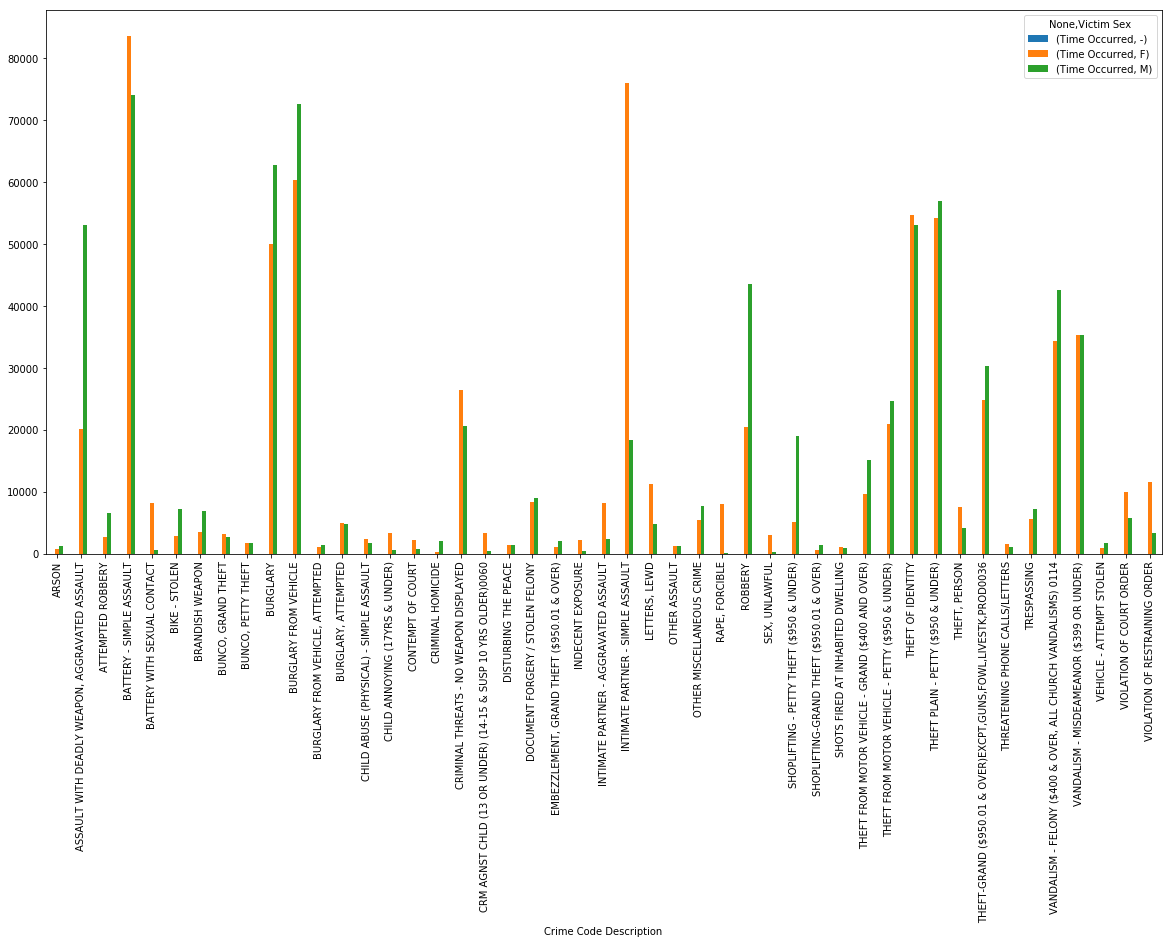

In [175]:
df5.unstack().plot(kind = 'bar')

## insights from above chart

### Battery - Simple Assault is the No.1 crime with biggest victims group

for women in LA : Intimate Partner - Simple Assault is the biggest threat
### 